In [1]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as plt
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cm
sns.set(rc={"figure.figsize": (12.,6.)})

In [2]:
data=pd.read_csv('../Data/test.csv')
data.head(2)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/43916178,20211205213126,2021-12-06,bright room to unplug and disconnect,this bright and quiet bedroom will offer you t...,Amsterdam Oost is becoming every day a more co...,https://a0.muscache.com/pictures/96d9838d-1200...,9574877,https://www.airbnb.com/users/show/9574877,Filippo,2013-10-22,"Amsterdam, North Holland, Netherlands",I'm a young Italian designer with the passion ...,within an hour,100%,50%,f,https://a0.muscache.com/im/pictures/user/64492...,https://a0.muscache.com/im/pictures/user/64492...,NaN,1,1,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Oost,NaN,52.35713,4.92470,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,29,59,89,89,2021-12-06,2,2,2,2021-11-16,2021-11-07,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0363 06C1 183D 5969 41C2,f,1,0,1,0,2.0
1,1,https://www.airbnb.com/rooms/45539504,20211205213126,2021-12-06,STAY CLOSE IN OUR SEMI-PRIVATE BUNK POD FOR 2,"BUNK Hotel Amsterdam is situated in the hip, u...",Just minutes by free ferry from Central Statio...,https://a0.muscache.com/pictures/44c4cc8e-2dc5...,243878598,https://www.airbnb.com/users/show/243878598,Bunk,2019-02-18,Netherlands,BUNK bridges the gap between hotels and hostel...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/f29b2...,https://a0.muscache.com/im/pictures/user/f29b2...,NaN,0,0,"['email', 'phone']",t,t,"Amsterdam, Noord-Holland, Netherlands",Oud-Noord,NaN,52.38810,4.91438,Shared room in hostel,Shared room,2,NaN,1 shared bath,1.0,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,1.0,3.0,999.0,999.0,1.0,999.0,NaN,t,0,0,5,280,2021-12-06,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exempt,t,12,0,10,2,NaN


Firstly we drop those columns that, without any analysis, we know we wont wont use them to predict the price

In [3]:
data=data.drop(columns=['listing_url','scrape_id','last_scraped','name','picture_url','host_url','host_name','host_thumbnail_url',
              'host_picture_url','license','host_about','description','host_location','host_neighbourhood',
                       'neighbourhood_group_cleansed','bathrooms','calendar_updated','calendar_last_scraped',
                       'host_verifications','host_id','host_since','host_response_time','host_response_rate',
                       'host_acceptance_rate','first_review','last_review'])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1389 non-null   int64  
 1   neighborhood_overview                         967 non-null    object 
 2   host_is_superhost                             1389 non-null   object 
 3   host_listings_count                           1389 non-null   int64  
 4   host_total_listings_count                     1389 non-null   int64  
 5   host_has_profile_pic                          1389 non-null   object 
 6   host_identity_verified                        1389 non-null   object 
 7   neighbourhood                                 967 non-null    object 
 8   neighbourhood_cleansed                        1389 non-null   object 
 9   latitude                                      1389 non-null   f

In [5]:
data.shape

(1389, 47)

We need to know the proportion of nan values

In [6]:
pd.options.display.min_rows = 74
nan=((data.isnull().sum())/len(data))*100
nan.sort_values(ascending = False)[:25]

neighborhood_overview                           30.381569
neighbourhood                                   30.381569
review_scores_cleanliness                        9.935205
review_scores_accuracy                           9.863211
review_scores_location                           9.863211
review_scores_checkin                            9.863211
review_scores_communication                      9.863211
review_scores_value                              9.863211
review_scores_rating                             9.719222
reviews_per_month                                9.719222
beds                                             5.543557
bedrooms                                         5.183585
bathrooms_text                                   0.431965
instant_bookable                                 0.000000
calculated_host_listings_count                   0.000000
calculated_host_listings_count_entire_homes      0.000000
has_availability                                 0.000000
calculated_hos

We drop more columns that contains same information than others with less nan values

In [7]:
data=data.drop(columns=['neighbourhood','neighborhood_overview'])

In [8]:
data.shape

(1389, 45)

Before droping more columns we analyzed the correlation between them in different groups, so we change to numeric those we need to compare

In [9]:
data[['host_total_listings_count', 'maximum_nights','maximum_maximum_nights',
                   'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
                  'review_scores_communication','review_scores_value']] = data[['host_total_listings_count', 
                   'maximum_nights','maximum_maximum_nights',
                   'minimum_nights_avg_ntm','number_of_reviews','review_scores_accuracy',
                  'review_scores_communication','review_scores_value']].apply(pd.to_numeric,errors='coerce',axis=1)

1. *Host_listings_count*

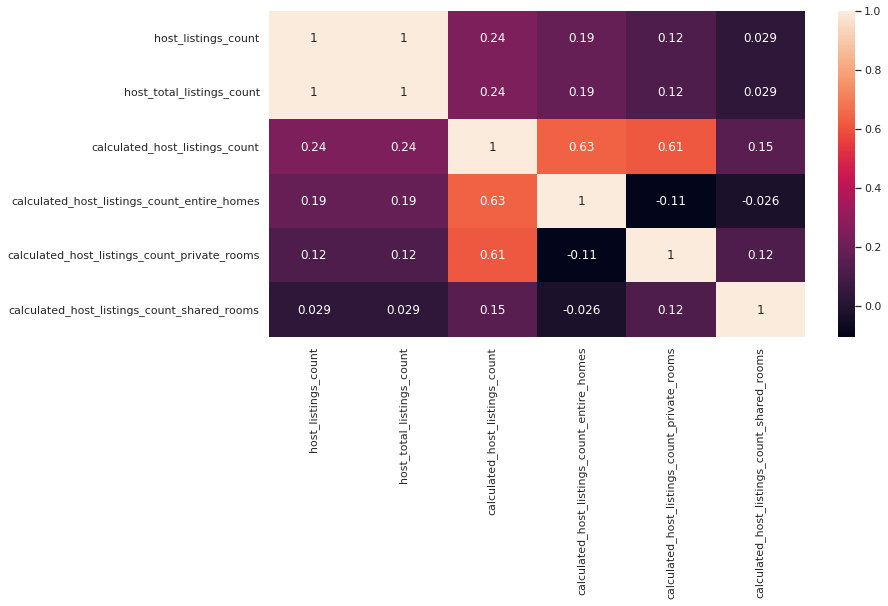

In [10]:
corrMatrix=data[['host_listings_count','host_total_listings_count', 'calculated_host_listings_count',
                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                 'calculated_host_listings_count_shared_rooms']].corr()
sns.heatmap(corrMatrix, annot=True);

In [11]:
compare= data[["host_total_listings_count", "calculated_host_listings_count",'calculated_host_listings_count_entire_homes',
                    'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']]
compare.sample(5)

,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
411,1.0,1,1,0,0
16,1.0,1,1,0,0
742,1.0,1,1,0,0
971,1.0,1,1,0,0
61,0.0,1,1,0,0


In [12]:
difference=print(sum((data.host_listings_count == data.calculated_host_listings_count) == False))
difference

482


After analysing this corrMatrix, we drop all the columns except 'calculated_host_listings_count' due its the sum of the other three calculated columns (regarding host_listings) and also because it reflects the same information as host_total_listings_count in about 65% of the rows. 
The only difference is that it is data obtained from scraping, while the other source is arbnb.

In [13]:
data1=data.drop(columns=['host_total_listings_count','calculated_host_listings_count_entire_homes',
                        'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','host_listings_count'])

2. *Minimum & Maximum nights*

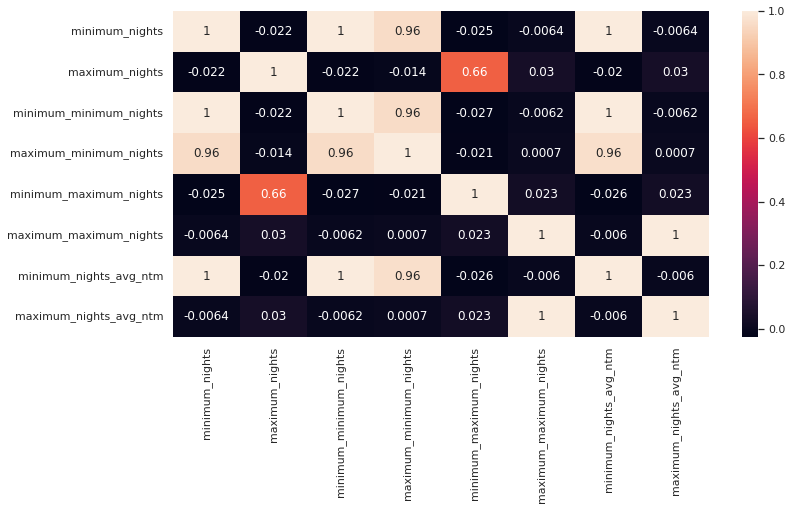

In [14]:
corrMatrix=data1[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm']].corr();
sns.heatmap(corrMatrix, annot=True);

In [15]:
sum((data1.minimum_nights == data1.minimum_minimum_nights) == False)

99

After analysing this corrMatrix, we drop all the columns except 'minimum_nights' & 'maximum_nights' due to their correlation with the others.

In [16]:
data2=data1.drop(columns=['minimum_minimum_nights','maximum_minimum_nights',
                 'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',
                 'maximum_nights_avg_ntm'])

3. *Availability*

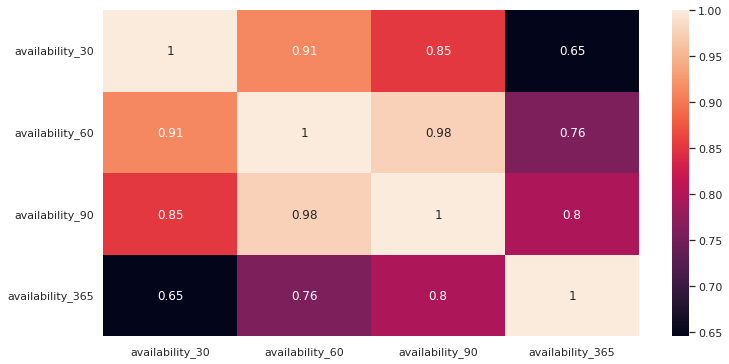

In [17]:
corrMatrix = data2[['availability_30', 'availability_60', 'availability_90','availability_365']].corr()
sns.heatmap(corrMatrix, annot=True);

In [18]:
sum((data2.availability_90 == data2.availability_60) == False)

658

After analysing this corrMatrix, we drop all the columns except 'availability_90' due its the one with the highest correlation with the others

In [19]:
data3=data2.drop(columns=['availability_30', 'availability_60','availability_365'])

4. *Reviews*

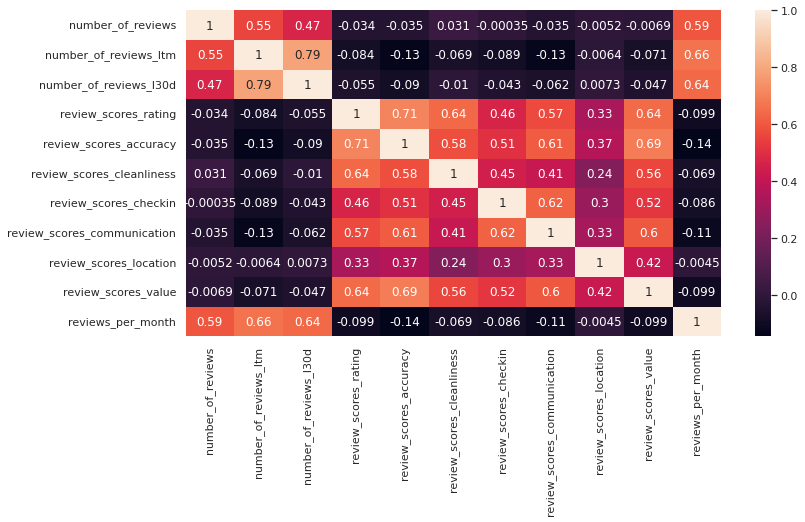

In [20]:
corrMatrix=data3[['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_rating',
                 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                 'review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']].corr();
sns.heatmap(corrMatrix, annot=True);

After analysing this corrMatrix, we drop all the columns except 'number_of_reviews','review_scores_rating', due correlation

In [21]:
datas=data3.drop(columns=['number_of_reviews_ltm', 'number_of_reviews_l30d','review_scores_accuracy','review_scores_cleanliness',
                          'review_scores_checkin','review_scores_communication','review_scores_location',
                          'review_scores_value','reviews_per_month'])

In [22]:
datas.shape

(1389, 22)

In [23]:
datas.head(2)

,id,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,f,t,t,Oud-Oost,52.35713,4.92470,Private room in rental unit,Private room,1,1 shared bath,1.0,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125.0,t,89,2.0,5.0,f,1
1,1,f,t,t,Oud-Noord,52.38810,4.91438,Shared room in hostel,Shared room,2,1 shared bath,1.0,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365.0,t,5,0.0,NaN,t,12


We check again columns with nan values >20% and the ones we have already analyzed the correlation

In [24]:
pd.options.display.min_rows = 82
nan1=(datas.isnull().sum()/len(datas))*100
nan1.sort_values(ascending = False)[:10]

review_scores_rating    9.719222
beds                    5.543557
bedrooms                5.183585
bathrooms_text          0.431965
instant_bookable        0.000000
number_of_reviews       0.000000
availability_90         0.000000
has_availability        0.000000
maximum_nights          0.000000
minimum_nights          0.000000
dtype: float64

Now, we continue checking the columns related to the host info with nan values >20%

In [25]:
corr_total=datas.corr().T
corr_total.sum()

id                                1.075075
latitude                          1.017605
longitude                         1.451003
accommodates                      2.602223
bedrooms                          2.092340
beds                              2.697610
minimum_nights                    1.015132
maximum_nights                    1.111232
availability_90                   1.167925
number_of_reviews                 0.922067
review_scores_rating              0.418150
calculated_host_listings_count    0.923750
dtype: float64

We check the columuns throught a correlation again to verify there is not any high correlation anymore

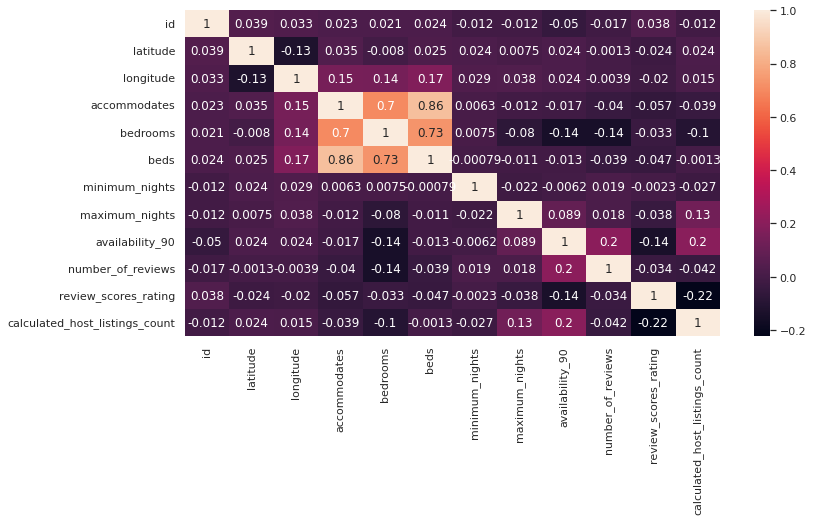

In [26]:
corrMatrix = datas.corr()
sns.heatmap(corrMatrix,annot=True)
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_context("poster")
sns.set_style("whitegrid")
plt.show()

For latitude and longitude we create a different dataframe to use later and beds due correlation with accomodates

In [27]:
location=datas[['id','latitude','longitude']]

In [28]:
dt=datas.drop(columns=['latitude','longitude','beds'])

In [29]:
dt.isnull().sum()

id                                  0
host_is_superhost                   0
host_has_profile_pic                0
host_identity_verified              0
neighbourhood_cleansed              0
property_type                       0
room_type                           0
accommodates                        0
bathrooms_text                      6
bedrooms                           72
amenities                           0
minimum_nights                      0
maximum_nights                      0
has_availability                    0
availability_90                     0
number_of_reviews                   0
review_scores_rating              135
instant_bookable                    0
calculated_host_listings_count      0
dtype: int64

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including:

In [30]:
#Replacing columns with f/t with 0/1
dt.replace({'f': 0, 't': 1}, inplace=True)

We change to numeric several columns to plot the histograms

In [31]:
dt[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']] = dt[['host_is_superhost',
    'host_has_profile_pic','host_identity_verified','instant_bookable','bedrooms',
    'has_availability']].apply(pd.to_numeric,errors='coerce',axis=1)

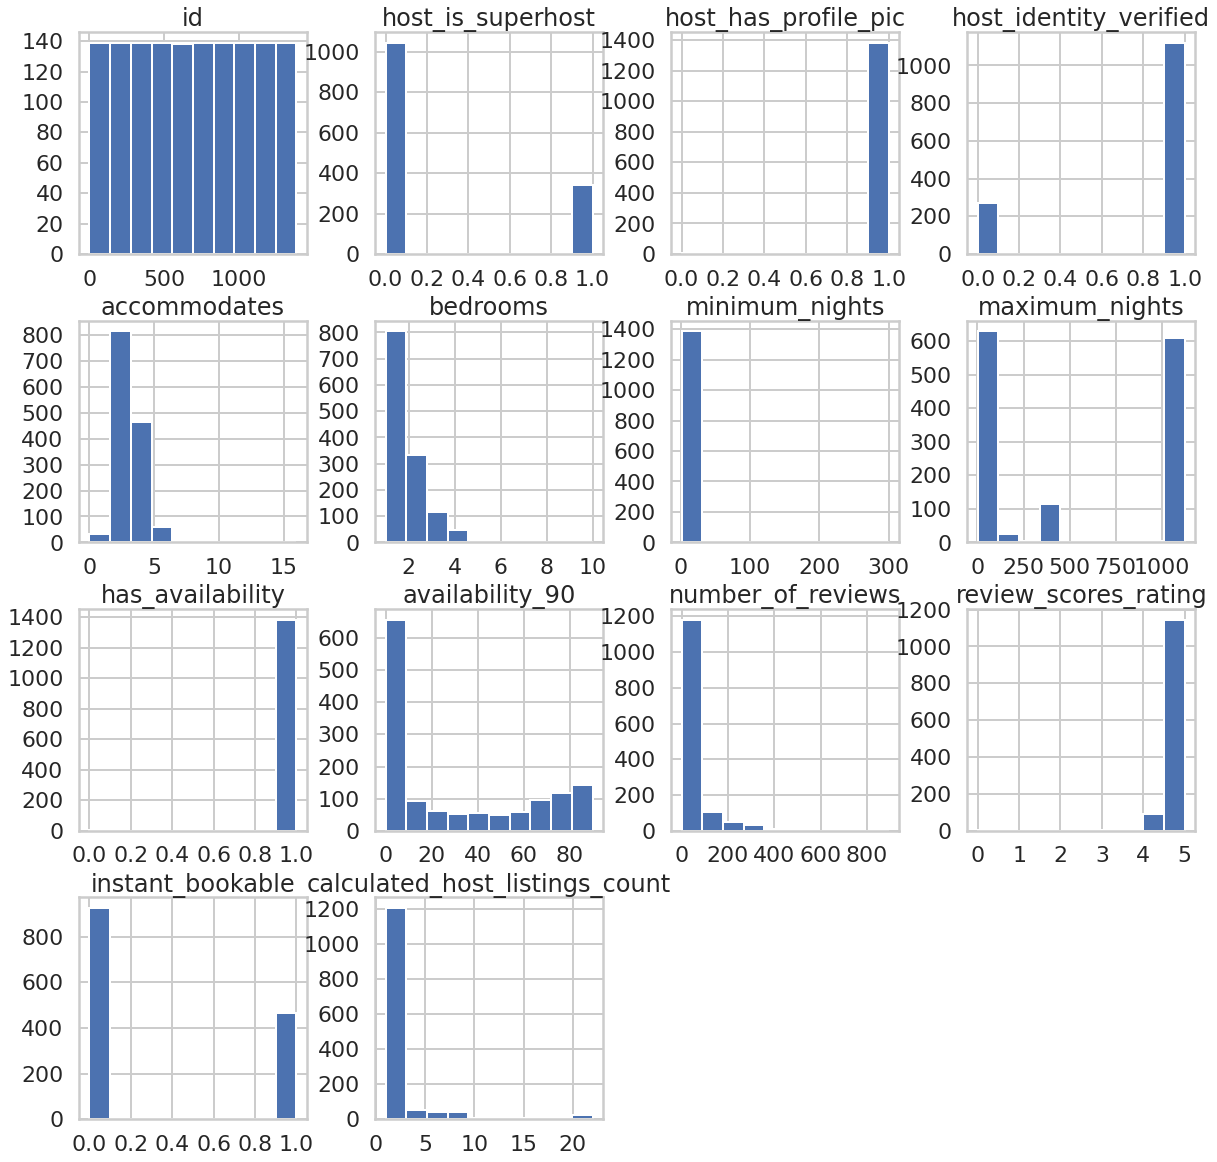

In [32]:
dt.hist(figsize=(20,20));
sns.set(rc={"figure.figsize": (20.,20.)})
plt.xticks(size = 0)
plt.yticks(size = 0);

With the histograms, we can observe that several columns only contain one category and can be dropped:

In [33]:
dt=dt.drop(columns=['has_availability','host_has_profile_pic'])

In [34]:
dt.shape

(1389, 17)

In [35]:
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0.0,1.0,Oud-Oost,Private room in rental unit,Private room,1,1 shared bath,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125.0,89,2.0,5.0,0.0,1
1,1,0.0,1.0,Oud-Noord,Shared room in hostel,Shared room,2,1 shared bath,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365.0,5,0.0,NaN,1.0,12


We check again the sum of nan values to replace them where its convenient

In [36]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_rating    135
bedrooms                 72
bathrooms_text            6
amenities                 0
instant_bookable          0
number_of_reviews         0
availability_90           0
maximum_nights            0
dtype: int64

We drop the rows with NaNs in the reviews columns

We will replace the NaN's in the bedrooms columns with the median

In [37]:
round(dt.bedrooms.mean())

2

In [38]:
dt[['bedrooms']]=dt[['bedrooms']].fillna(value=round(dt.bedrooms.mean()))

In [39]:
dt.bedrooms.isnull().sum()

0

In [40]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_rating    135
bathrooms_text            6
id                        0
amenities                 0
instant_bookable          0
number_of_reviews         0
availability_90           0
maximum_nights            0
dtype: int64

In [41]:
import re
def limpieza2(x):
    x=re.findall('[0-9.]+',str(x))
    if len(x)>0:
        return x[0]
    else:
        return 0

In [42]:
dt['bathrooms_text']=dt['bathrooms_text'].apply(limpieza2)
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0.0,1.0,Oud-Oost,Private room in rental unit,Private room,1,1,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125.0,89,2.0,5.0,0.0,1
1,1,0.0,1.0,Oud-Noord,Shared room in hostel,Shared room,2,1,1.0,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365.0,5,0.0,NaN,1.0,12


In [43]:
dt.shape

(1389, 17)

In [44]:
dt.head(1)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0.0,1.0,Oud-Oost,Private room in rental unit,Private room,1,1,1.0,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125.0,89,2.0,5.0,0.0,1


In [45]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)[:8]

review_scores_rating    135
id                        0
amenities                 0
instant_bookable          0
number_of_reviews         0
availability_90           0
maximum_nights            0
minimum_nights            0
dtype: int64

In [46]:
dt[['review_scores_rating']]=dt[['review_scores_rating']].fillna(value=0)

In [47]:
pd.options.display.min_rows = 82
na=(dt.isnull().sum())
na.sort_values(ascending = False)

id                                0
amenities                         0
instant_bookable                  0
review_scores_rating              0
number_of_reviews                 0
availability_90                   0
maximum_nights                    0
minimum_nights                    0
bedrooms                          0
host_is_superhost                 0
bathrooms_text                    0
accommodates                      0
room_type                         0
property_type                     0
neighbourhood_cleansed            0
host_identity_verified            0
calculated_host_listings_count    0
dtype: int64

float to integer

In [48]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   host_is_superhost               1389 non-null   float64
 2   host_identity_verified          1389 non-null   float64
 3   neighbourhood_cleansed          1389 non-null   object 
 4   property_type                   1389 non-null   object 
 5   room_type                       1389 non-null   object 
 6   accommodates                    1389 non-null   int64  
 7   bathrooms_text                  1389 non-null   object 
 8   bedrooms                        1389 non-null   float64
 9   amenities                       1389 non-null   object 
 10  minimum_nights                  1389 non-null   int64  
 11  maximum_nights                  1389 non-null   float64
 12  availability_90                 13

In [49]:
dt= dt.astype({'host_is_superhost':'int','host_identity_verified':'int','bedrooms':'int',
              'maximum_nights':'int','number_of_reviews':'int','instant_bookable':'int'}) 

In [50]:
dt.head(2)

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,amenities,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0,1,Oud-Oost,Private room in rental unit,Private room,1,1,1,"[""Hangers"", ""Drying rack for clothing"", ""Freez...",2,1125,89,2,5.0,0,1
1,1,0,1,Oud-Noord,Shared room in hostel,Shared room,2,1,1,"[""Building staff"", ""Wifi"", ""Long term stays al...",1,365,5,0,0.0,1,12


In [51]:
dt=dt.drop(columns='amenities')

In [52]:
def room(x):
    if 'bed and breakfast'in x:
        return 'bed and breakfast'
    elif 'rental unit'in x:
        return 'house'
    elif 'hostel' in x:
        return 'hostel'
    elif 'condominium' in x:
        return 'condominium'
    elif 'townhouse' in x:
        return 'house'
    elif 'hotel' in x:
        return 'hotel'
    elif 'villa' in x:
        return 'house'
    elif 'chalet' in x:
        return 'house'
    elif 'apartment' in x:
        return 'apartment'
    elif 'house' in x:
        return 'house'
    elif 'home' in x:
        return 'house'
    elif 'houseboat' in x:
        return 'house'
    elif 'loft' in x:
        return 'apartment'
    elif 'guest' in x:
        return 'house'
    elif 'farm' in x:
        return 'house'
    elif 'boat' in x:
        return 'boat'
    elif 'bungalow' in x:
        return 'house'
    elif 'lodge' in x:
        return 'house'
    elif 'resort' in x:
        return 'resort'
    elif 'castle' in x:
        return 'castle'
    elif 'casa' in x:
        return 'house'
    elif 'tipi' in x:
        return 'bungalow'
    else:
        return '-'

In [53]:
dt['property_type']=dt['property_type'].apply(room)

In [54]:
dt.head()

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0,1,Oud-Oost,house,Private room,1,1,1,2,1125,89,2,5.00,0,1
1,1,0,1,Oud-Noord,hostel,Shared room,2,1,1,1,365,5,0,0.00,1,12
2,2,0,1,De Baarsjes - Oud-West,house,Entire home/apt,2,1,1,5,1125,0,10,4.78,1,1
3,3,0,1,Centrum-Oost,house,Private room,2,1,1,3,1125,0,41,4.61,0,2
4,4,0,0,Zuid,house,Entire home/apt,2,1.5,1,2,5,0,0,0.00,0,1


In [55]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389 entries, 0 to 1388
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1389 non-null   int64  
 1   host_is_superhost               1389 non-null   int64  
 2   host_identity_verified          1389 non-null   int64  
 3   neighbourhood_cleansed          1389 non-null   object 
 4   property_type                   1389 non-null   object 
 5   room_type                       1389 non-null   object 
 6   accommodates                    1389 non-null   int64  
 7   bathrooms_text                  1389 non-null   object 
 8   bedrooms                        1389 non-null   int64  
 9   minimum_nights                  1389 non-null   int64  
 10  maximum_nights                  1389 non-null   int64  
 11  availability_90                 1389 non-null   int64  
 12  number_of_reviews               13

In [56]:
dt.head()

,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count
0,0,0,1,Oud-Oost,house,Private room,1,1,1,2,1125,89,2,5.00,0,1
1,1,0,1,Oud-Noord,hostel,Shared room,2,1,1,1,365,5,0,0.00,1,12
2,2,0,1,De Baarsjes - Oud-West,house,Entire home/apt,2,1,1,5,1125,0,10,4.78,1,1
3,3,0,1,Centrum-Oost,house,Private room,2,1,1,3,1125,0,41,4.61,0,2
4,4,0,0,Zuid,house,Entire home/apt,2,1.5,1,2,5,0,0,0.00,0,1


Now, we convert the object columns with 'get dummy'

In [57]:
final=pd.get_dummies(data=dt,columns=['neighbourhood_cleansed','property_type','room_type','bathrooms_text'], drop_first=True)
final.head()

,id,host_is_superhost,host_identity_verified,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_apartment,property_type_bed and breakfast,property_type_boat,property_type_condominium,property_type_hostel,property_type_hotel,property_type_house,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0,bathrooms_text_1,bathrooms_text_1.5,bathrooms_text_2,bathrooms_text_2.5,bathrooms_text_3,bathrooms_text_3.5,bathrooms_text_4
0,0,0,1,1,1,2,1125,89,2,5.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
1,1,0,1,2,1,1,365,5,0,0.00,1,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,2,0,1,2,1,5,1125,0,10,4.78,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,3,0,1,2,1,3,1125,0,41,4.61,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0
4,4,0,0,2,1,2,5,0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [58]:
final['bathrooms_text_4.5']=0
final['bathrooms_text_5']=0
final['bathrooms_text_5.5']=0

In [59]:
final.head()

,id,host_is_superhost,host_identity_verified,accommodates,bedrooms,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,neighbourhood_cleansed_Centrum-West,neighbourhood_cleansed_De Aker - Nieuw Sloten,neighbourhood_cleansed_De Baarsjes - Oud-West,neighbourhood_cleansed_De Pijp - Rivierenbuurt,neighbourhood_cleansed_Gaasperdam - Driemond,neighbourhood_cleansed_Geuzenveld - Slotermeer,neighbourhood_cleansed_IJburg - Zeeburgereiland,neighbourhood_cleansed_Noord-Oost,neighbourhood_cleansed_Noord-West,neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt,neighbourhood_cleansed_Osdorp,neighbourhood_cleansed_Oud-Noord,neighbourhood_cleansed_Oud-Oost,neighbourhood_cleansed_Slotervaart,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,property_type_apartment,property_type_bed and breakfast,property_type_boat,property_type_condominium,property_type_hostel,property_type_hotel,property_type_house,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0,bathrooms_text_1,bathrooms_text_1.5,bathrooms_text_2,bathrooms_text_2.5,bathrooms_text_3,bathrooms_text_3.5,bathrooms_text_4,bathrooms_text_4.5,bathrooms_text_5,bathrooms_text_5.5
0,0,0,1,1,1,2,1125,89,2,5.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,1,2,1,1,365,5,0,0.00,1,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
2,2,0,1,2,1,5,1125,0,10,4.78,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,0,1,2,1,3,1125,0,41,4.61,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,4,0,0,2,1,2,5,0,0,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [60]:
final.shape

(1389, 54)

In [61]:
final.to_csv('Test3.csv', index=False)